# Product Profitability Prediction
**Predicting sales of four different product types: PC, Laptops, Netbooks and Smartphones.**

## Background
### Problem

The sales team of Blackwell Electronics has some concerns about ongoing product sales in one of our stores. 
Specifically, they have been tracking the sales performance of specific product types and would like our data science 
team to do a product profitabilty prediction analysis. They'd like us to include the ‘product type’ in our predictions
to better understand how specific product types perform against each other. They have asked our team to analyze 
historical sales data and then make sales volume predictions for a list of new product types. This will help the sales
team better understand how types of products might impact sales across the enterprise.

### Goals

* Predict the sales in four different product types. 
* Assess the effects service and customer reviews have on sales.

### Dataset Information

* Existing product file contains sales performance of 80 products. This file will be used for analyzing and training.
* New product file contains 24 new products that we will make the sales volume and profitabiltiy prediction on. 
* Product sales performance include:
     * Product type and number
     * 1-5 star reviews
     * Positive and negative reviews
     * If the product was recomanded and bestseller rank
     * Product dimensions
     * Product profit margin and sales volume


## Pre-Process

### Dummify the data

Most data will contain a mixture of numeric and nominal data so we need to understand how to incorporate both when it 
comes to developing regression models and making predictions. 

Categorical variables may be used directly as predictor or predicted variables in a multiple regression model as long 
as they've been converted to binary values. In order to pre-process the sales data as needed we first need to convert 
all object data type to binary features that contain ‘0’ and ‘1’ classes. We use get_dummies() function from pandas 
library to achieve this. 

### Check for correlation

Correlation is a measure of the relationship between two or more features or variables. We were tasked with 
ascertaining if some specific features impact on weekly sales volume in this problem, we can create a correlation matrix
to achieve this. 

### Missing values

We use sum() function to check for and count missing values. Missing data is represented by "NA". There are many 
methods of addressing missing values, we chose to delet the variable becasue it counts almost 20% of the feature data.

#### Import libraries and upload the data

In [609]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# for the plot to look good 
%matplotlib inline

# load the dataset 
existing = pd.read_csv('existingproductattributes2017.csv')

#### Initial explore the data

In [189]:
# use df.head() to check the features and the strcture of the dataset
existing.head()

,ProductType,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
0,PC,101,949.00,3,3,2,0,0,2,0,0.9,1967.0,25.8,23.94,6.62,16.89,0.15,12
1,PC,102,2249.99,2,1,0,0,0,1,0,0.9,4806.0,50.0,35.00,31.75,19.00,0.25,8
2,PC,103,399.00,3,0,0,0,0,1,0,0.9,12076.0,17.4,10.50,8.30,10.20,0.08,12
3,Laptop,104,409.99,49,19,8,3,9,7,8,0.8,109.0,5.7,15.00,9.90,1.30,0.08,196
4,Laptop,105,1079.99,58,31,11,7,36,7,20,0.7,268.0,7.0,12.90,0.30,8.90,0.09,232


In [5]:
# use df.info() to check the data types
existing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
ProductType              80 non-null object
ProductNum               80 non-null int64
Price                    80 non-null float64
x5StarReviews            80 non-null int64
x4StarReviews            80 non-null int64
x3StarReviews            80 non-null int64
x2StarReviews            80 non-null int64
x1StarReviews            80 non-null int64
PositiveServiceReview    80 non-null int64
NegativeServiceReview    80 non-null int64
Recommendproduct         80 non-null float64
BestSellersRank          65 non-null float64
ShippingWeight           80 non-null float64
ProductDepth             80 non-null float64
ProductWidth             80 non-null float64
ProductHeight            80 non-null float64
ProfitMargin             80 non-null float64
Volume                   80 non-null int64
dtypes: float64(8), int64(9), object(1)
memory usage: 11.3+ KB


#### Dummify 'ProductType'

From the previous step, we can see that the data type of 'ProductType' is object. Since it's also categorical data, we
will convert it to dummy variables for the algorithm to perform properly in the future.

In [610]:
# use df.get_dummies() to convert the data type to dummy variable. 
dummyProduct = pd.get_dummies(existing['ProductType'])
dummyProduct.head()

,Accessories,Display,ExtendedWarranty,GameConsole,Laptop,Netbook,PC,Printer,PrinterSupplies,Smartphone,Software,Tablet
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


#### Add dummy variables to the dataset and delete the original 'ProductType' feature

In [611]:
# concatenate dummy variable dataset with the orginal dataset
existing = pd.concat([dummyProduct, existing], axis=1)

# delete the "ProductType" variable
existing = existing.drop('ProductType', axis=1)

# check the columns names 
existing.columns

Index(['Accessories', 'Display', 'ExtendedWarranty', 'GameConsole', 'Laptop',
       'Netbook', 'PC', 'Printer', 'PrinterSupplies', 'Smartphone', 'Software',
       'Tablet', 'ProductNum', 'Price', 'x5StarReviews', 'x4StarReviews',
       'x3StarReviews', 'x2StarReviews', 'x1StarReviews',
       'PositiveServiceReview', 'NegativeServiceReview', 'Recommendproduct',
       'BestSellersRank', 'ShippingWeight', 'ProductDepth', 'ProductWidth',
       'ProductHeight', 'ProfitMargin', 'Volume'],
      dtype='object')

#### Checking and address missing values

In [284]:
existing.isnull().sum()

Accessories               0
Display                   0
ExtendedWarranty          0
GameConsole               0
Laptop                    0
Netbook                   0
PC                        0
Printer                   0
PrinterSupplies           0
Smartphone                0
Software                  0
Tablet                    0
ProductNum                0
Price                     0
x5StarReviews             0
x4StarReviews             0
x3StarReviews             0
x2StarReviews             0
x1StarReviews             0
PositiveServiceReview     0
NegativeServiceReview     0
Recommendproduct          0
BestSellersRank          15
ShippingWeight            0
ProductDepth              0
ProductWidth              0
ProductHeight             0
ProfitMargin              0
Volume                    0
dtype: int64

There are 15 missing values for "BestSellersRank" variable, which count about 20% of the that column. As mentioned 
above, we will delete this variable. 

In [612]:
existing = existing.drop('BestSellersRank', 1)

#### Initial plotting

From common sense, we assume that both good and bad reviews have significant impact on sales valume. We will plot 5 star, 1 star and positive review to see if our assumption stands. 

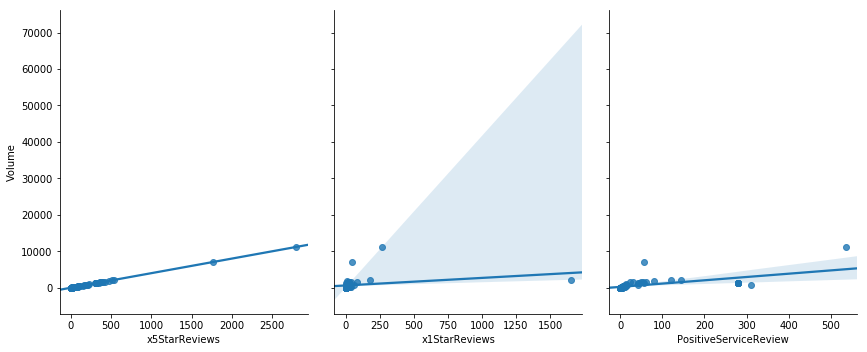

In [623]:
reviewPlot = sns.pairplot(x_vars=['x5StarReviews','x1StarReviews','PositiveServiceReview']  , y_vars='Volume', 
                            data=existing, height=5, aspect=0.8, kind='reg')
reviewPlot

The first plot with 5 star reviews shows the more positive review the more sales volume. 1 star and positive review don't show too obvious relationships. Next, let's build a confusion matrix to get a further investigation. 

#### Checking for correlation

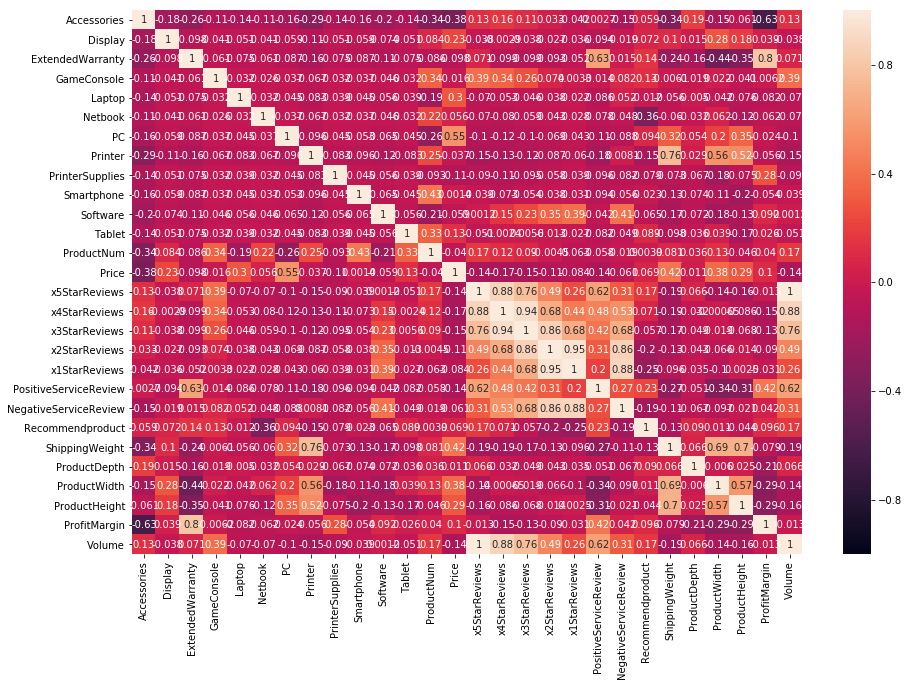

In [615]:
# create a correlation matrix 
corr = existing.corr()

# plot a heatmap of the correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

Correlation matrix revealed 1-5 star reviews, positive and negative reviews has greater relationship with sales volume,
recommend product, product dimensions and profit margin are not so much. We will have this in consideration when we 
subset dataset for training and testing later on. 

#### Checking variable importance

From the correlation matrix, we subset the correlation of 1-5 star reviews, positve, negative reviews in regarding Volume. We then plot it to investigate the importance of these variables. 

In [616]:
# create a dataframe for stars and reviews in regarding to volume
corr_sr = corr.loc['x5StarReviews':'NegativeServiceReview', ['Volume']]
reviews = ['5 star','4 star','3 star','2 star','1 star','Positive', 'Negative']
corr_sr['Reviews'] = reviews
corr_sr

,Volume,Reviews
x5StarReviews,1.000000,5 star
x4StarReviews,0.879006,4 star
x3StarReviews,0.763373,3 star
x2StarReviews,0.487279,2 star
x1StarReviews,0.255024,1 star
PositiveServiceReview,0.622260,Positive
NegativeServiceReview,0.309419,Negative


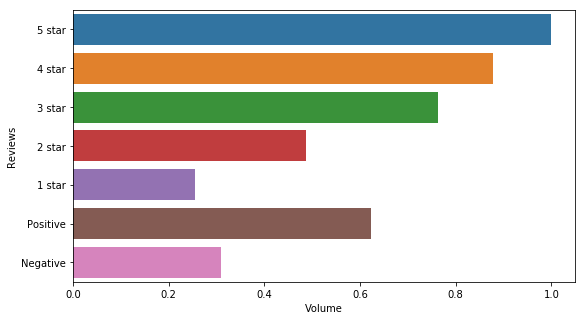

In [788]:
# plot the star and review correlation matrix
plt.figure(figsize = (9,5))
sns.barplot(data=corr_sr,  x='Volume', y='Reviews')

5 star review has absolute impact on the sales volume, they have a correlation coefficient 1. 4 star, 3 star review, positive review also have significant impact on sales volume. 1 star, 2 star and negative reviews dont have too much impact on the volume. It seems customers are more likly driven by the good reviews than bad reviews. 

#### Checking and remove highly correlated features

Highly correlated features could cause overfitting problem, so we will make a subset without the highly correlated features. We will use this dataset for few training later on to see how it performs. 

Here, we built another correlation matrix without dependent variable 'Volume', to see the correlation between the independent variables/factors.

In [619]:
# use for loop to check and list highly correlated features.
highlyCorrelated = set()
corr_matrix = existing.drop('Volume', axis=1).corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.9:
            varName = corr_matrix.columns[i]
            highlyCorrelated.add(varName)

highlyCorrelated

{'x1StarReviews', 'x3StarReviews'}

#### Create a subset without highly related factors

Here we call it cm dataset for convinience. 

In [620]:
# create the subset 
existing_cm = existing.drop(['x1StarReviews', 'x3StarReviews'], axis=1)

In [720]:
# create training and testing sets for cm dataset
features_cm = existing_cm.iloc[:, 0:25]
depVar_cm = existing_cm['Volume']
X_cm_train, X_cm_test, y_cm_train, y_cm_test =  train_test_split(features_cm,depVar_cm,test_size = 0.25, 
                                                                         random_state= 0)


## Develop the Models

### Random Forest

Random Forest algorithms is under the tree model family. Tree model is a flowchart-like structure that works by splitting the sample based on the maximum informative vaiable, named nodes. Each nodes will then split again, the process repeats until the subsamples cannot be split any further.

Random Forest works by constructing multiple decision trees and output the average. The advantage of Random forests is avoiding overfitting from simple decision tree model.

### SVM

SVM (Support Vector Machine) works by assigning examples to one category or the other. Given known training examples, the algorithm builds an optimal hyperplane which categorizes new examples. The advantage of SVM is it builds non-linear hyperpane which is able to classifiy higher dimensional problems.

### Gradient Boosting

Gradient Boosting and example of one of the ensemble method, boosting. Unlike Random Forest which take the average of multiple decisions, Boosting trains the predictors sequentially. It works by learning mistakes from the previous predictors, the process iterates to reduce the error untill it finds the optimal one. 

### Cross Validation

Cross-validation is a resampling procedure. It splits a given data sample into numbers of groups. Each group is called a fold, total k(any number) folds. It chose a training set of the size of one fold, train our model on that partition, all the folds will be examined. Then it evaluate the results on the remaining test data. The final results/scores are averaged out. This could avoid overfitting problem.

#### Import related libraries

In [625]:
# estimators/regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# model evaluate metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#### Define three regressors

In [624]:
rfRegressor = RandomForestRegressor(n_estimators=20)
SVRRegressor = SVR(kernel='linear')
GBRegressor = GradientBoostingRegressor(n_estimators=15)

#### Use cross_var_score to check the performance on three regressors

* Random Forest

In [722]:
cmScore_rf = cross_val_score(rfRegressor, X_cm_train, y_cm_train, cv=10)
# calculate the mean of all 10 RSquared from cross validation 
print('RSquared mean of random forest tranining set : %.3f' % cmScore_rf.mean())

RSquared mean of random forest tranining set : 0.787


* Suport Vector Machine

In [723]:
cmScore_SVR = cross_val_score(SVRRegressor, X_cm_train, y_cm_train, cv=10)
print('RSquared mean of SVR model : %0.2f' % cmScore_SVR.mean())

RSquared mean of SVR model : 1.00


With RSquared being 1, the model is overfitting. We will train other subsets with SVR later to see if it will perform better. 

* Gradient Boosting

In [724]:
cmScore_GB = cross_val_score(GBRegressor, X_cm_train, y_cm_train, cv=10)
print('RSquared mean of GB model : %0.3f' % cmScore_GB.mean())

RSquared mean of GB model : 0.544


#### Fit the best performer 
Random Forest has the highest R score without overfitting, we will use it to fit the model and test the model on the testing set. 

In [732]:
#Model Fitting
cmRF = rfRegressor.fit(X_cm_train,y_cm_train)

#Make Predictions
cmPred = cmRF.predict(X_cm_test)
cmRsquared = r2_score(y_cm_test, cmPred)
cmRMSE = sqrt(mean_squared_error(y_cm_test, cmPred))
print('R Squared: %.3f' % cmRsquared)
print('RMSE: %.3f' % cmRMSE)

R Squared: 0.633
RMSE: 951.590


## Recursive Feature Elimination

We are not very satisfied with the models we have built using cm dataset(the one without highly correlated predictors). All three regressors are not performing very pleasantly. Here we will try to use an automatic feature selection tool, Recursive Feature Elimination. 

Recursive Feature Elimination(RFE) builds models to implement backwards selection of predictors based on predictor importance ranking. The least important predictors will be removed and the model will be re-built. The processe happens recursively untill the optimal/indicated subset of predictors are found. This subset can be used to produce an accurate model.

### Train RFE model

In [413]:
from sklearn.feature_selection import RFE

# dummy var causes error for rfe, we have to drop dummy var
X = existing_cm.iloc[:, 12:25]
target = existing_cm['Volume']

# we use random forest to train rfe model
regressor = RandomForestRegressor(n_estimators=30)
rfe = RFE(estimator=regressor)
rfe_fit = rfe.fit(X, target)

### Build a subset with the optimal features

In [414]:
# RFE function will keep half of the features if it's not specified
print('Optimal number of features: {}'.format(rfe.n_features_))

Optimal number of features: 6


In [415]:
# check which features to keep 
print(rfe.support_)

[ True False  True  True  True  True False False False False  True False
 False]


In [733]:
# index of variables to drop 
cols = [13, 18, 19, 20, 21, 23, 24, 25]

# creating traing and testing sets
features_rfe = existing_cm.drop(existing_cm.columns[cols], axis=1)
depVar_rfe = existing_cm['Volume']
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test =  train_test_split(features_rfe,depVar_rfe,test_size = 0.25, 
                                                                         random_state= 0)

### Train rfe subset with all three regressors

#### Use cross_var_score to see the performance of all three regressors
* Random Forest

In [734]:
rfeScore_rf = cross_val_score(rfRegressor, X_rfe_train, y_rfe_train, cv=10)
print('RSquared mean of random forest model : %0.3f' % rfeScore_rf.mean())

RSquared mean of random forest model : 0.865


* Suport Vector Machine

In [735]:
rfeScore_SVR = cross_val_score(SVRRegressor, X_rfe_train, y_rfe_train, cv=10)
print('RSquared mean of SVR model : %0.3f' % rfeScore_SVR.mean())

RSquared mean of SVR model : 1.000


* **Gradient Boosting**

In [736]:
rfeScore_GB = cross_val_score(GBRegressor, X_rfe_train, y_rfe_train, cv=10)
print('RSquared mean of gradient boosting model : %0.3f' % rfeScore_GB.mean())

RSquared mean of gradient boosting model : 0.560


### Fit the best performer
Random Forest has the highest R score without overfitting, we will use it to fit the model and test the model on the testing set.

In [737]:
#Model Fitting
rfeRF = rfRegressor.fit(X_rfe_train,y_rfe_train)

#Make Predictions
rfePred = rfeRF.predict(X_rfe_test)
rfeRsquared = r2_score(y_rfe_test, rfePred)
rfeRMSE = sqrt(mean_squared_error(y_rfe_test, rfePred))
print('R Squared: %.3f' % rfeRsquared)
print('RMSE: %.3f' % rfeRMSE)

R Squared: 0.876
RMSE: 552.442


## Model Selection

**We will use two statistical measurements to evaluate the models, R-Squared and RMSE**

**R-Squared** measures the percentage of the variance between the dependent variable that is predicted from the independent variables and the observed dependent variable.  

**RMSE**(Root Mean Squared Error) measures the error between predicted and observed values. In other words, how close the real data are fitted to the prediction.

* Comparison of R-Squared and RMSE for random forest models of both subsets.

| Scores |cmRF |rfeRF|
|---|-------|-----|
|RSquared|0.633|0.876|
|RMSE|951.590|552.442|

* Comparison of R-Squared of the cross validation and testing sets for both subsets.

|Scores |cv_cmRF|cmRF|cv_rfeRF|rfeRF|
|-------|----|------|-----|--------|
|RSquared|0.787|0.633|0.865|0.876|

We picked the Random Forest model using recursive feature elimination dataset. It has the highest RMSE and RSquared, at the same time it has the smallest variance for R-Squared between training set and testing set.  

## Make Predictions of the new products

#### Load the data and perform any necessary pre-processing

In [765]:
new = pd.read_csv('newproductattributes2017.csv')

In [758]:
# use df.get_dummies() to convert the data type to dummy variable. 
dummyNew = pd.get_dummies(new['ProductType'])
# concatenate dummy variable dataset with the orginal dataset
new = pd.concat([dummyNew, new], axis=1)
# delete the "ProductType" and "BestSellersRank" variables
new = new.drop('ProductType', axis=1)
new = new.drop('BestSellersRank', 1)
# delete other variables from manual feature selection
new_manual = new.drop(['Price','Recommendproduct',
       'ShippingWeight', 'ProductDepth',  'ProductHeight',
       'ProfitMargin', 'x1StarReviews', 'x3StarReviews', 'NegativeServiceReview'], axis=1)
new_manual.columns

Index(['Accessories', 'Display', 'ExtendedWarranty', 'GameConsole', 'Laptop',
       'Netbook', 'PC', 'Printer', 'PrinterSupplies', 'Smartphone', 'Software',
       'Tablet', 'ProductNum', 'x5StarReviews', 'x4StarReviews',
       'x2StarReviews', 'PositiveServiceReview', 'ProductWidth', 'Volume'],
      dtype='object')

#### Make predictions using random forest and cross validation

In [759]:
# take out dependent variable
feature_new = new_manual.iloc[:, 0:18]
 
# make Predictions
newPred = rfeRF.predict(feature_new)

#### Create a final output with product type and profit

In [774]:
# add volume and create profit variable
profit = new
profit['Volume'] = newPred
profit['Profit'] = profit['Volume'] * profit['Price'] * profit['ProfitMargin']

# create a dataset with product type and profit 
profit = profit[['ProductType','Profit']]

## Final Analysis and Visualization 

### Profit by product type

In [781]:
profit.groupby('ProductType').sum().loc[['PC','Laptop','Netbook','Smartphone']]

,Profit
ProductType,
PC,109248.85000
Laptop,40318.68000
Netbook,41440.84984
Smartphone,22086.04200


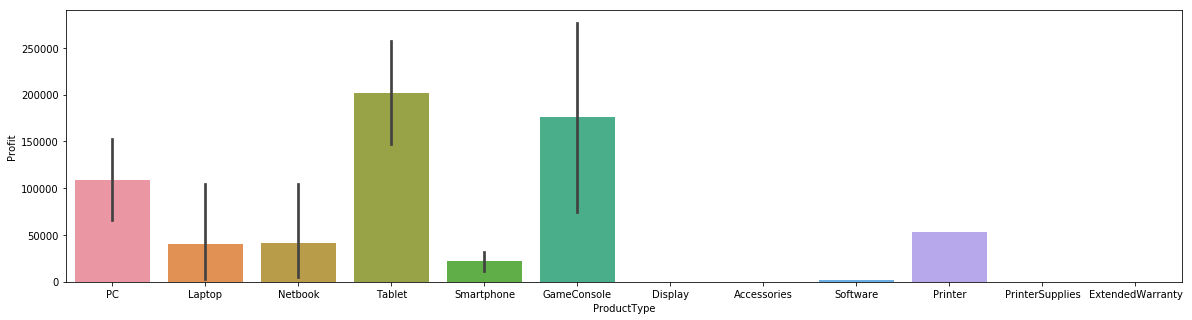

In [787]:
plt.figure(figsize = (20,5))
sns.barplot(data=profit,  x='ProductType', y='Profit', estimator=sum)

We were asked to predict the profitability of PC, Laptop, Notebook and Smartphone. PC shows the highest profit among the four. But from the plot below, we can see Tablets and GameConsole actually have the highest profit among all the products. We should focus more on these two products. 


### Reviews Importance 

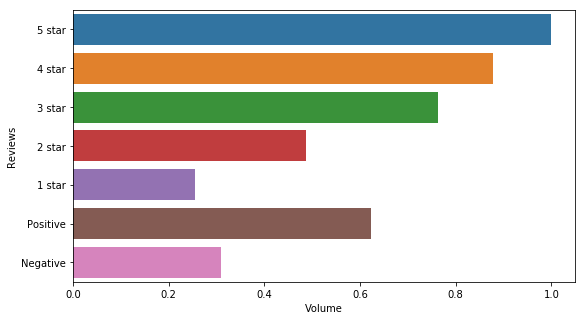

In [783]:
# plot the star and review correlation matrix
plt.figure(figsize = (9,5))
sns.barplot(data=corr_sr,  x='Volume', y='Reviews')

5 star review has absolute impact on the sales volume. 4 star, 3 star review, positive review also have significant impact on sales volume. 1 star, 2 star and negative reviews dont have too much impact on the volume. It seems customers are more likly driven by the good reviews than bad reviews.

**Here ends our project**